# Machine Learning

In this file, instructions how to approach the challenge can be found.

We are going to work on different types of Machine Learning problems:

- **Regression Problem**: The goal is to predict delay of flights.
- **(Stretch) Multiclass Classification**: If the plane was delayed, we will predict what type of delay it is (will be).
- **(Stretch) Binary Classification**: The goal is to predict if the flight will be cancelled.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Main Task: Regression Problem

The target variable is **ARR_DELAY**. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.  

For example, variables **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY** shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights **1 week in advance**.

In [5]:
df = pd.read_csv('January_flight_data.csv')
df

,op_carrier_fl_num,op_unique_carrier,origin_airport_id,dest_airport_id,distance,route,month,day,arr_delay
0,56,B6,12264,10721,413,12264-10721,1,26,-8.0
1,57,B6,10721,12264,413,10721-12264,1,26,-32.0
2,61,B6,10721,14843,1674,10721-14843,1,26,-20.0
3,62,B6,14027,12953,1035,14027-12953,1,26,-18.0
4,65,B6,12478,10140,1826,12478-10140,1,26,-11.0
...,...,...,...,...,...,...,...,...,...
1239863,51,B6,10721,13204,1121,10721-13204,1,26,-22.0
1239864,52,B6,13204,10721,1121,13204-10721,1,26,-3.0
1239865,53,B6,12478,14027,1028,12478-14027,1,26,-22.0
1239866,54,B6,14027,12478,1028,14027-12478,1,26,-18.0


In [14]:
# drop rows with missing values
df.dropna(inplace=True)

In [15]:
df.shape

(1217645, 9)

In [9]:
df['route'].value_counts()

12892-14771    3105
14771-12892    3105
13930-12953    2430
12953-13930    2424
12892-12889    2199
               ... 
14761-16133       1
16133-14761       1
12889-11122       1
11122-12889       1
12278-11267       1
Name: route, Length: 5909, dtype: int64

In [8]:
df['op_carrier_fl_num'].value_counts()

478     610
403     590
195     583
425     569
665     564
       ... 
6564      1
6533      1
6705      1
6872      1
9301      1
Name: op_carrier_fl_num, Length: 7079, dtype: int64

In [6]:
df['op_unique_carrier'].value_counts()

WN    218453
AA    149121
DL    143515
OO    125634
UA     91387
YX     49708
B6     47821
MQ     47327
OH     43815
9E     37344
AS     35884
YV     33696
EV     32189
NK     29033
F9     19164
QX     18824
ZW     16356
PT     15802
CP     15616
G7     14622
G4     13515
HA     13412
AX     13394
C5      7032
VX      5720
EM       742
KS       401
9K       341
Name: op_unique_carrier, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

# initialize LabelEncoder
le = LabelEncoder()

# fit and transform the data
df['op_unique_carrier'] = le.fit_transform(df['op_unique_carrier'])
df['route'] = le.fit_transform(df['route'])
df['route'].value_counts()

3019    3105
5278    3105
4074    2430
3121    2424
2982    2199
        ... 
5239       1
5907       1
2848       1
1108       1
2578       1
Name: route, Length: 5909, dtype: int64

In [81]:
X = df.drop(['origin_airport_id','month','arr_delay'], axis=1)
y = df['arr_delay']

                   op_carrier_fl_num  op_unique_carrier  dest_airport_id  \
op_carrier_fl_num           1.000000           0.246099        -0.035986   
op_unique_carrier           0.246099           1.000000         0.043771   
dest_airport_id            -0.035986           0.043771         1.000000   
distance                   -0.356135          -0.151063         0.071344   
route                      -0.025266           0.041642         0.034984   
day                        -0.008833          -0.009033        -0.006057   

                   distance     route       day  
op_carrier_fl_num -0.356135 -0.025266 -0.008833  
op_unique_carrier -0.151063  0.041642 -0.009033  
dest_airport_id    0.071344  0.034984 -0.006057  
distance           1.000000  0.074672 -0.015244  
route              0.074672  1.000000 -0.006159  
day               -0.015244 -0.006159  1.000000  


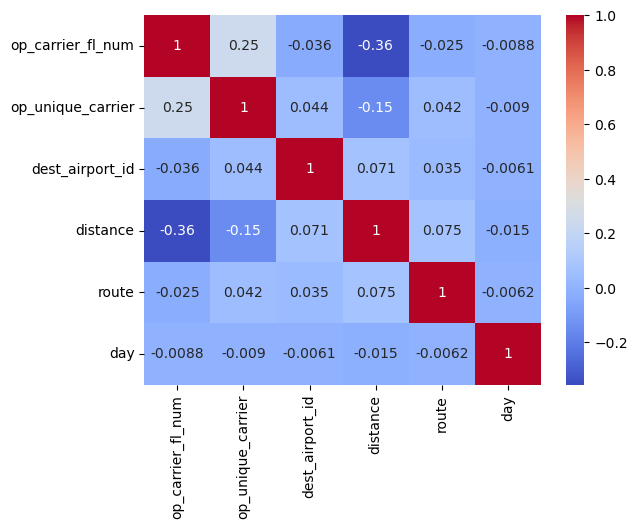

In [82]:
# Assuming your independent variables are stored in a pandas DataFrame called X
corr_matrix = X.corr()

# Print the correlation matrix
print(corr_matrix)

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [83]:
# split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
# train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [85]:
# evaluate the model on the testing dataset
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 2598.389255703197


In [86]:
from scipy import stats

In [87]:
r_sq = lr_model.score(X_train, y_train)
r_sq

0.004417212930548864

In [88]:
from sklearn.feature_selection import f_regression

# Get the number of features in the model
n_features = X_train.shape[1]
n_features

6

In [89]:
# Calculate the adjusted R-squared value
n_samples = X_train.shape[0]
adj_r_sq = 1 - (1 - r_sq) * (n_samples - 1) / (n_samples - n_features - 1)
adj_r_sq

0.004411080663294986

In [90]:
# Calculate the F-statistic and corresponding p-values for each feature
f_stats, p_values = f_regression(X_train, y_train)

f_stats

array([2.53771625e+03, 1.72240887e+00, 5.49086435e-01, 1.53553668e+03,
       8.29561181e+00, 9.71897488e+02])

In [91]:
X.columns.tolist()

['op_carrier_fl_num',
 'op_unique_carrier',
 'dest_airport_id',
 'distance',
 'route',
 'day']

In [92]:
p_values

array([0.00000000e+000, 1.89383574e-001, 4.58691395e-001, 0.00000000e+000,
       3.97418555e-003, 2.93937403e-213])

### Feature Engineering

Feature engineering will play a crucial role in this problems. We have only very little attributes so we need to create some features that will have some predictive power.

- weather: we can use some weather API to look for the weather in time of the scheduled departure and scheduled arrival.
- statistics (avg, mean, median, std, min, max...): we can take a look at previous delays and compute descriptive statistics
- airports encoding: we need to think about what to do with the airports and other categorical variables
- time of the day: the delay probably depends on the airport traffic which varies during the day.
- airport traffic
- unsupervised learning as feature engineering?
- **what are the additional options?**: Think about what we could do more to improve the model.

### Feature Selection / Dimensionality Reduction

We need to apply different selection techniques to find out which one will be the best for our problems.

- Original Features vs. PCA conponents?

### Modeling

Use different ML techniques to predict each problem.

- linear / logistic / multinomial logistic regression
- Naive Bayes
- Random Forest
- SVM
- XGBoost
- The ensemble of your own choice

### Evaluation

You have data from 2018 and 2019 to develop models. Use different evaluation metrics for each problem and compare the performance of different models.

You are required to predict delays on **out of sample** data from **first 7 days (1st-7th) of January 2020** and to share the file with LighthouseLabs. Sample submission can be found in the file **_sample_submission.csv_**

======================================================================
## Stretch Tasks

### Multiclass Classification

The target variables are **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY**. We need to do additional transformations because these variables are not binary but continuos. For each flight that was delayed, we need to have one of these variables as 1 and others 0.

It can happen that we have two types of delays with more than 0 minutes. In this case, take the bigger one as 1 and others as 0.

### Binary Classification

The target variable is **CANCELLED**. The main problem here is going to be huge class imbalance. We have only very little cancelled flights with comparison to all flights. It is important to do the right sampling before training and to choose correct evaluation metrics.